## Power Spectrum Figure for Prelims based on MODIS SST and chla
Testing implementation of https://xrft.readthedocs.io/en/latest/MITgcm_example.html#Isotropic-wavenumber-spectrum

In [1]:
import numpy as np
import xarray as xr
import os.path as op
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#url = 'https://oceandata.sci.gsfc.nasa.gov/opendap/hyrax/MODISA/L3SMI/2009/041/A20090412009048.L3m_8D_CHL_chlor_a_4km.nc'
url = 'https://oceandata.sci.gsfc.nasa.gov/opendap/hyrax/MODISA/L3SMI/2020/258/A2020258.L3m_DAY_CHL_chlor_a_9km.nc'
#url_sst = 'https://oceandata.sci.gsfc.nasa.gov/opendap/hyrax/MODISA/L3SMI/2009/041/A20090412009048.L3m_8D_SST_sst_4km.nc'
ds = xr.open_dataset(url)
#ds_sst = xr.open_dataset(url_sst)

In [4]:
ds.chlor_a.attrs['long_name'] = "Chl-a"
ds.attrs['latitude_units'] = "" 
ds.attrs['longitude_units'] = ""
ds.attrs['geospatial_lat_units'] = "" 
ds.attrs['geospatial_lon_units'] = ""
ds

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 2160, lon: 4320, rgb: 3)
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.791664 ... -89.87501 -89.958336
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95834
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 ...
    chlor_a  (lat, lon) float32 ...
Attributes:
    product_name:                      A2020258.L3m_DAY_CHL_chlor_a_9km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.1QLP
    date_created:                      2020-09-15T05:28:06.000Z
    history:                           l3mapgen par=A2020258.L3m_DAY_CHL_chlo...
    l2_flag_names:                     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,...
    time_coverage_start:               2020-09-14T00:45:00.000Z
    time_coverage_end:                 2020-09-15T02:04:57.000Z
    start_orbit_number:                97720
    end_orbit_number:                  97736
    map_projection:                    Equidistant Cylindrical
    latitude_units:                    
    longitude_units:                   
    northernmost_latitude:             90.0
    southernmost_latitude:             -90.0
    westernmost_longitude:             -180.0
    easternmost_longitude:             180.0
    geospatial_lat_max:                90.0
    geospatial_lat_min:                -90.0
    geospatial_lon_max:                180.0
    geospatial_lon_min:                -180.0
    latitude_step:                     0.083333336
    longitude_step:                    0.083333336
    sw_point_latitude:                 -89.958336
    sw_point_longitude:                -179.95833
    spatialResolution:                 9.28 km
    geospatial_lon_resolution:         0.083333336
    geospatial_lat_resolution:         0.083333336
    geospatial_lat_units:              
    geospatial_lon_units:              
    number_of_lines:                   2160
    number_of_columns:                 4320
    measure:                           Mean
    suggested_image_scaling_minimum:   0.01
    suggested_image_scaling_maximum:   20.0
    suggested_image_scaling_type:      LOG
    suggested_image_scaling_applied:   No
    _lastModified:                     2020-09-15T05:28:06.000Z
    Conventions:                       CF-1.6 ACDD-1.3
    institution:                       NASA Goddard Space Flight Center, Ocea...
    standard_name_vocabulary:          CF Standard Name Table v36
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    id:                                A2020258.L3b_DAY_CHL.nc/L3/A2020258.L3...
    license:                           https://science.nasa.gov/earth-science...
    creator_name:                      NASA/GSFC/OBPG
    publisher_name:                    NASA/GSFC/OBPG
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    creator_url:                       https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Mapped
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2018
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    _NCProperties:                     version=2,netcdf=4.7.1,hdf5=1.10.5,
    data_bins:                         Attribute edlided: Unsupported attribu...
    data_minimum:                      0.012723563
    data_maximum:    

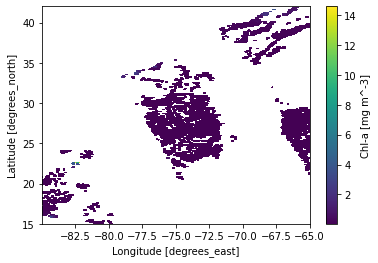

In [5]:
data_mab_nj = ds.sel( lat=slice(42, 15), lon=slice(-85,-65))
data_mab_nj.chlor_a.plot()

In [ ]:
ds_sst.sst.attrs['long_name'] = "SST"
ds_sst.sst.attrs['units'] = "C"
ds_sst.attrs['latitude_units'] = "" 
ds_sst.attrs['longitude_units'] = ""
ds_sst.attrs['geospatial_lat_units'] = "" 
ds_sst.attrs['geospatial_lon_units'] = ""

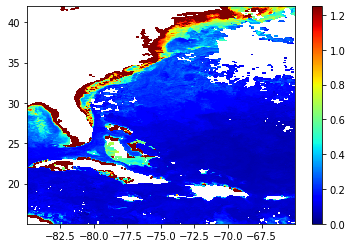

In [ ]:
data_mab_nj = ds.sel( lat=slice(42, 15), lon=slice(-85,-65))
data_mab_nj_full = ds.sel( lat=slice(42, 15), lon=slice(-85,-65))
plt.pcolor(data_mab_nj.lon, data_mab_nj.lat, data_mab_nj.chlor_a, vmax=1.25, vmin=0, cmap='jet')
plt.colorbar()

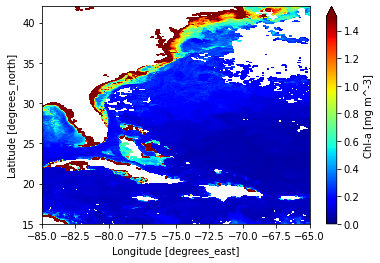

In [ ]:
data_mab_nj_full.chlor_a.plot(vmax=1.5, vmin=0, cmap='jet')

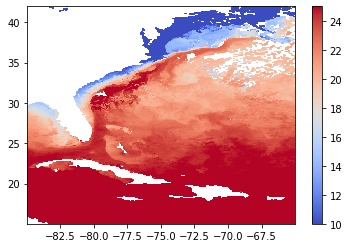

In [ ]:
data_mab_nj_sst = ds_sst.sel( lat=slice(42, 15), lon=slice(-85,-65))
data_mab_nj_sst_full = ds_sst.sel( lat=slice(42, 15), lon=slice(-85,-65))
plt.pcolor(data_mab_nj_sst.lon, data_mab_nj_sst.lat, data_mab_nj_sst.sst, vmin=10, vmax=25, cmap='coolwarm')
plt.colorbar()

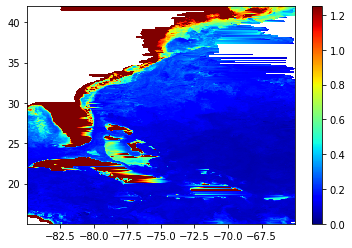

In [ ]:
data_mab_nj.chlor_a[:,:] = data_mab_nj.chlor_a.interpolate_na(dim='lon', method='linear', limit=None, max_gap=None)
plt.pcolor(data_mab_nj.lon, data_mab_nj.lat, data_mab_nj.chlor_a, vmax=1.25, vmin=0, cmap='jet')
plt.colorbar()

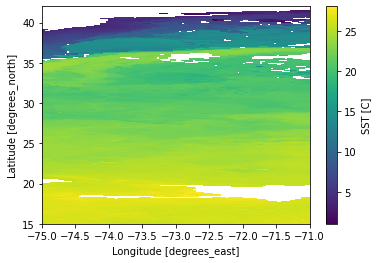

In [ ]:
ds_sst.sel(lat=slice(42, 15),lon=slice(-75,-71)).sst.plot()

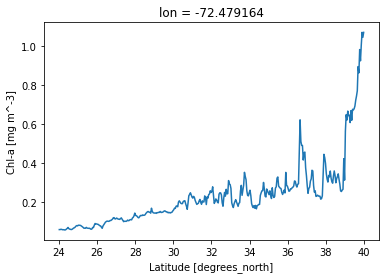

In [ ]:
linear_subset = data_mab_nj.sel(lat=slice(40,24)).chlor_a[:,300]
# from scipy import interpolate
# subset_x = np.arange(0, len(linear_subset))
# interp_linear_subset = interpolate.interp1d(subset_x, linear_subset)
# plt.plot(interp_linear_subset(subset_x))
linear_subset.plot()

In [ ]:
np.argwhere(np.isnan(np.array(linear_subset)))

array([], shape=(0, 1), dtype=int64)

In [ ]:
linear_subset[102] = 0.2

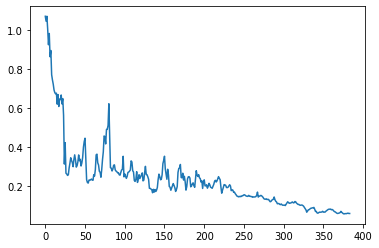

In [ ]:
plt.plot(np.array(linear_subset))